# Pay Equity Analysis
dataset info:

Title: Human Resources Data Set

Dataset Source: Kaggle

Dataset URL: https://www.kaggle.com/datasets/rhuebner/human-resources-data-set

Date Accessed: October 5, 2023

In [4]:
# Importing py libraries
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Processing dataset into a py dataframe for analysis
df = pd.read_csv('HRDataset_v14.csv')

In [6]:
# EDA
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

              Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  \
0       Adinolfi, Wilson  K  10026          0                0         1   
1  Ait Sidi, Karthikeyan     10084          1                1         1   
2         Akinkuolie, Sarah  10196          1                1         0   
3              Alagbe,Trina  10088          1                1         0   
4          Anderson, Carol   10069          0                2         0   

   EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  Salary  ...  \
0            1       5            4                       0   62506  ...   
1            5       3            3                       0  104437  ...   
2            5       5            3                       0   64955  ...   
3            1       5            3                       0   64991  ...   
4            5       5            3                       0   50825  ...   

      ManagerName  ManagerID RecruitmentSource PerformanceScore  \
0  Michael Albert  

                                     Female           Male  Pay Gap (%)
Position                                                               
Accountant I                   63000.000000   63761.500000     1.194294
Administrative Assistant       52280.000000            NaN          NaN
Area Sales Manager             63793.500000   65843.800000     3.113885
BI Developer                   95920.000000   95313.333333    -0.636497
BI Director                             NaN  110929.000000          NaN
CIO                           220450.000000            NaN          NaN
Data Analyst                   90909.666667   89199.750000    -1.916952
Data Analyst                            NaN   88527.000000          NaN
Data Architect                150290.000000            NaN          NaN
Database Administrator        107124.750000  113999.000000     6.030097
Director of Operations                  NaN  170500.000000          NaN
Director of Sales             180000.000000            NaN      

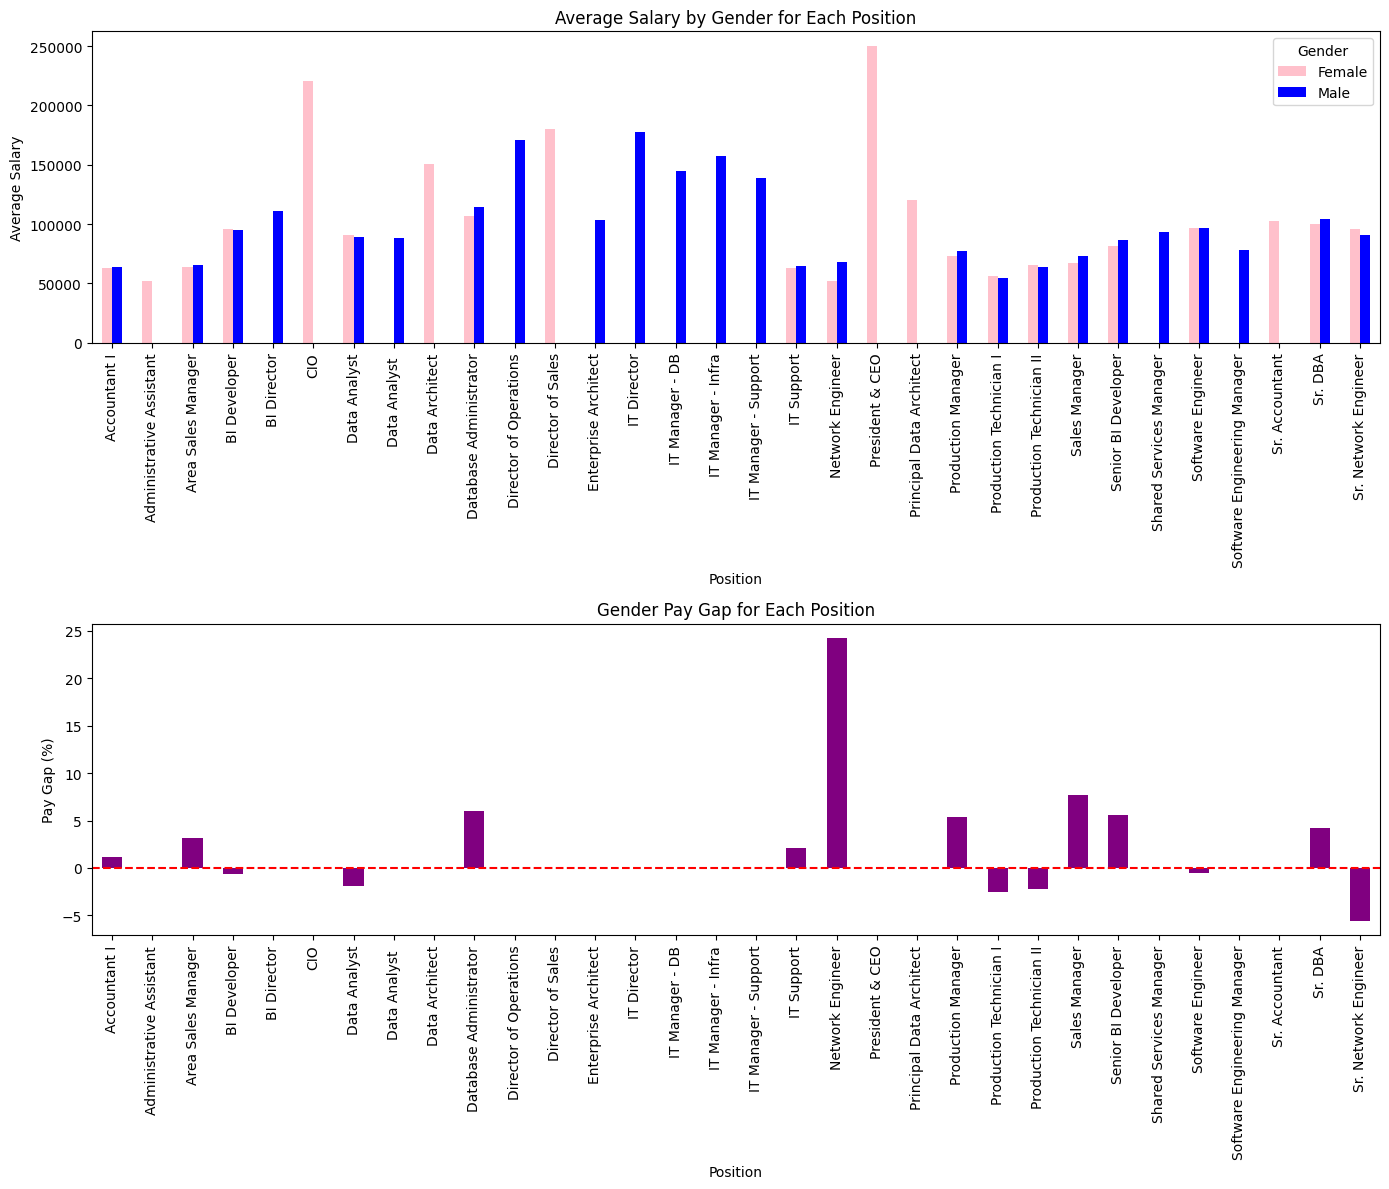

In [7]:
# Visualization of pay gap based on gender

# Grouping by Position and GenderID and calculating the average salary
avg_salary = df.groupby(['Position', 'GenderID'])['Salary'].mean().unstack()

# Renaming the columns for clarity
avg_salary.columns = ['Female', 'Male']

# Calculating the pay gap
avg_salary['Pay Gap (%)'] = ((avg_salary['Male'] - avg_salary['Female']) / avg_salary['Male']) * 100

print(avg_salary)

# Visualization
fig, ax = plt.subplots(2, 1, figsize=(14, 12))

# Average salary by gender for each position
avg_salary[['Female', 'Male']].plot(kind='bar', ax=ax[0], color=['pink', 'blue'])
ax[0].set_title('Average Salary by Gender for Each Position')
ax[0].set_ylabel('Average Salary')
ax[0].legend(title='Gender')

# Gender pay gap for each position
avg_salary['Pay Gap (%)'].plot(kind='bar', ax=ax[1], color='purple')
ax[1].set_title('Gender Pay Gap for Each Position')
ax[1].set_ylabel('Pay Gap (%)')
ax[1].axhline(0, color='red', linestyle='--')  # line for zero pay gap

plt.tight_layout()
plt.show()